In [5]:
import pandas as pd

# Load the data from Sheet1
data = pd.read_excel("C:\\Pyhton_Capstone\\Final_Dataset.xlsx")
(data.head())


,Serial No.,City Name,No. of seats,Caste type,Winning Candidate,State,Party,Electors,Votes,Turnout
0,1,Adilabad,1,ST,Godam Nagesh,Telangana,National Unity Party,"16,50,175","12,35,597",0.749
1,2,Agra,18,SC,Prof S P Singh Baghel,Uttar Pradesh,National Unity Party,"20,72,685","11,23,779",0.542
2,3,Ahmadnagar,37,GEN,Nilesh Dnyandev Lanke,Maharashtra,Nationalist Congress Party – Sharadchandra Pawar,"19,81,866","13,25,477",0.669
3,4,Ahmedabad East,7,GEN,Hasmukhbhai Patel (H.S.PATEL),Gujarat,National Unity Party,"20,38,162","11,28,339",0.554
4,5,Ahmedabad West,8,SC,Dineshbhai Makwana (ADVOCATE),Gujarat,National Unity Party,"17,26,987","9,66,646",0.560


In [9]:
# Standardize column names
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Convert 'electors' and 'votes' columns to numeric, handling non-numeric entries
for col in ['electors', 'votes']:
    data[col] = pd.to_numeric(data[col].replace(',', '', regex=True), errors='coerce')

# Replace missing or invalid values in numeric columns
data['electors'] = data['electors'].fillna(data['electors'].mean())
data['votes'] = data['votes'].fillna(data['votes'].median())

# Replace missing values in 'turnout' with a numeric placeholder or drop them
data['turnout'] = pd.to_numeric(data['turnout'], errors='coerce')
data['turnout'] = data['turnout'].fillna(data['turnout'].median())

# Replace missing values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Ensure 'no._of_seats' is integer
data['no._of_seats'] = pd.to_numeric(data['no._of_seats'], errors='coerce').fillna(0).astype(int)

# Drop duplicates if any
data = data.drop_duplicates()

# Save the cleaned data (optional)
data.to_excel('Cleaned_Dataset.xlsx', index=False)

print("Data preprocessing completed")



Data preprocessing completed


In [11]:
# Basic stats
print("Total number of seats:", data['no._of_seats'].sum())
print("Total number of candidates:", data.shape[0])
print("Unique parties:", data['party'].nunique())
print(data[['turnout', 'electors', 'votes']].describe())

Total number of seats: 9870
Total number of candidates: 543
Unique parties: 42
          turnout      electors         votes
count  543.000000  5.430000e+02  5.430000e+02
mean     0.668880  1.800474e+06  1.190679e+06
std      0.099748  3.601687e+05  2.444487e+05
min      0.386000  5.778400e+04  4.920000e+04
25%      0.587000  1.633828e+06  1.059064e+06
50%      0.659000  1.820854e+06  1.174982e+06
75%      0.755000  1.980864e+06  1.346307e+06
max      0.922000  3.779596e+06  2.453608e+06


In [13]:
# Top and bottom states by turnout
turnout_by_state = data.groupby('state')['turnout'].mean().sort_values()
print("Lowest turnout states:\n", turnout_by_state.head())
print("Highest turnout states:\n", turnout_by_state.tail())

# Correlation analysis
print("Correlation between electors and turnout:", data['electors'].corr(data['turnout']))


Lowest turnout states:
 state
Bihar            0.564675
Uttarakhand      0.570400
Uttar Pradesh    0.571800
Mizoram          0.574000
Nagaland         0.577000
Name: turnout, dtype: float64
Highest turnout states:
 state
Andhra Pradesh       0.81728
Arunachal Pradesh    0.81750
Tripura              0.81950
Sikkim               0.82900
Lakshadweep          0.85100
Name: turnout, dtype: float64
Correlation between electors and turnout: -0.38657623693445203


In [15]:
# Seats won by party
seats_by_party = data.groupby('party')['no._of_seats'].sum().sort_values(ascending=False)
print("Seats won by party:\n", seats_by_party)

Seats won by party:
 party
National Unity Party                                        3746
Samajwadi Party                                             1644
People's Democratic Alliance                                1295
Green Future Party                                           708
Dravida Munnetra Kazhagam                                    351
Nationalist Congress Party – Sharadchandra Pawar             241
Shiv Sena (Uddhav Balasaheb Thackrey)                        234
Telugu Desam                                                 217
Alliance for Equality (United)                               183
Shiv Sena                                                    181
Progressive Reform Congress                                  137
Lok Janshakti Party(Ram Vilas)                               125
Apna Dal (Soneylal)                                           79
Independent                                                   71
Yuvajana Sramika Rythu Congress Party                         6

In [17]:
# Candidate distribution by caste type
caste_distribution = data['caste_type'].value_counts()
print("Candidates by caste type:\n", caste_distribution)

# Turnout by caste type
turnout_by_caste = data.groupby('caste_type')['turnout'].mean().sort_values()
print("Turnout by caste type:\n", turnout_by_caste)

Candidates by caste type:
 caste_type
GEN        385
SC          84
ST          46
Unknown     26
GENP         2
Name: count, dtype: int64
Turnout by caste type:
 caste_type
GEN        0.655221
SC         0.665179
ST         0.724326
Unknown    0.773577
GENP       0.817500
Name: turnout, dtype: float64


In [25]:
# Statewise total votes and electors
statewise_summary = data.groupby('state')[['votes', 'electors']].sum()
statewise_summary['turnout_percentage'] = (statewise_summary['votes'] / statewise_summary['electors']) * 100
print(statewise_summary.sort_values('turnout_percentage', ascending=False))


                                votes   electors  turnout_percentage
state                                                               
Lakshadweep                   49200.0      57784           85.144677
Sikkim                       384893.0     464140           82.926057
Tripura                     2344154.0    2860287           81.955202
Assam                      20059870.0   24506236           81.856186
Andhra Pradesh             33729342.0   41333702           81.602519
Arunachal Pradesh            723247.0     892694           81.018468
West Bengal                60483687.0   76010006           79.573322
Pondicherry                  807940.0    1023699           78.923590
Manipur                     1593632.0    2029601           78.519473
Meghalaya                   1711967.0    2226567           76.888187
Goa                          906538.0    1179344           76.867988
Orissa                     25129026.0   33666719           74.640555
Ladakh                       13552

In [23]:
# Standardize column names
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Check and clean relevant columns
data['party'] = data['party'].fillna('Unknown')
data['no._of_seats'] = pd.to_numeric(data['no._of_seats'], errors='coerce').fillna(0)
data['votes'] = pd.to_numeric(data['votes'], errors='coerce').fillna(0)

# Aggregate total seats and votes by party
party_analysis = data.groupby('party').agg({
    'no._of_seats': 'sum',
    'votes': 'sum'
}).reset_index()

# Identify the winning party by seats
winning_party_by_seats = party_analysis.loc[party_analysis['no._of_seats'].idxmax()]

# Optionally, identify the party with the highest votes
winning_party_by_votes = party_analysis.loc[party_analysis['votes'].idxmax()]

# Print analysis results
print("### Overall Winning Party (By Seats) ###")
print(f"Party: {winning_party_by_seats['party']}")
print(f"Total Seats Won: {winning_party_by_seats['no._of_seats']}")

print("\n### Overall Leading Party (By Votes) ###")
print(f"Party: {winning_party_by_votes['party']}")
print(f"Total Votes Received: {winning_party_by_votes['votes']}")

### Overall Winning Party (By Seats) ###
Party: National Unity Party
Total Seats Won: 3746

### Overall Leading Party (By Votes) ###
Party: National Unity Party
Total Votes Received: 294524721.5


In [33]:
# Standardize column names
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Check and clean relevant columns
data['state'] = data['state'].fillna('Unknown')
data['party'] = data['party'].fillna('Unknown')
data['no._of_seats'] = pd.to_numeric(data['no._of_seats'], errors='coerce').fillna(0)

# Group data by state and party to find total seats
statewise_party_seats = data.groupby(['state', 'party'])['no._of_seats'].sum().reset_index()

# Identify the winning party in each state
statewise_winners = statewise_party_seats.loc[
    statewise_party_seats.groupby('state')['no._of_seats'].idxmax()
].sort_values('state')

# Print state-wise winners
print("### State-Wise Winning Parties ###")
print(statewise_winners)

# Save results to an Excel file (optional)
statewise_winners.to_excel('Statewise_Winning_Parties.xlsx', index=False)


### State-Wise Winning Parties ###
                        state                         party  no._of_seats
0   Andaman & Nicobar Islands          National Unity Party             1
3              Andhra Pradesh                  Telugu Desam           217
5           Arunachal Pradesh          National Unity Party             3
7                       Assam          National Unity Party            76
15                      Bihar          National Unity Party           203
18                 Chandigarh  People's Democratic Alliance             1
19               Chhattisgarh          National Unity Party            62
21       Dadra & Nagar Haveli          National Unity Party             1
22                Daman & Diu                   Independent             1
23                      Delhi          National Unity Party            28
25                        Goa  People's Democratic Alliance             2
26                    Gujarat          National Unity Party           349
28 

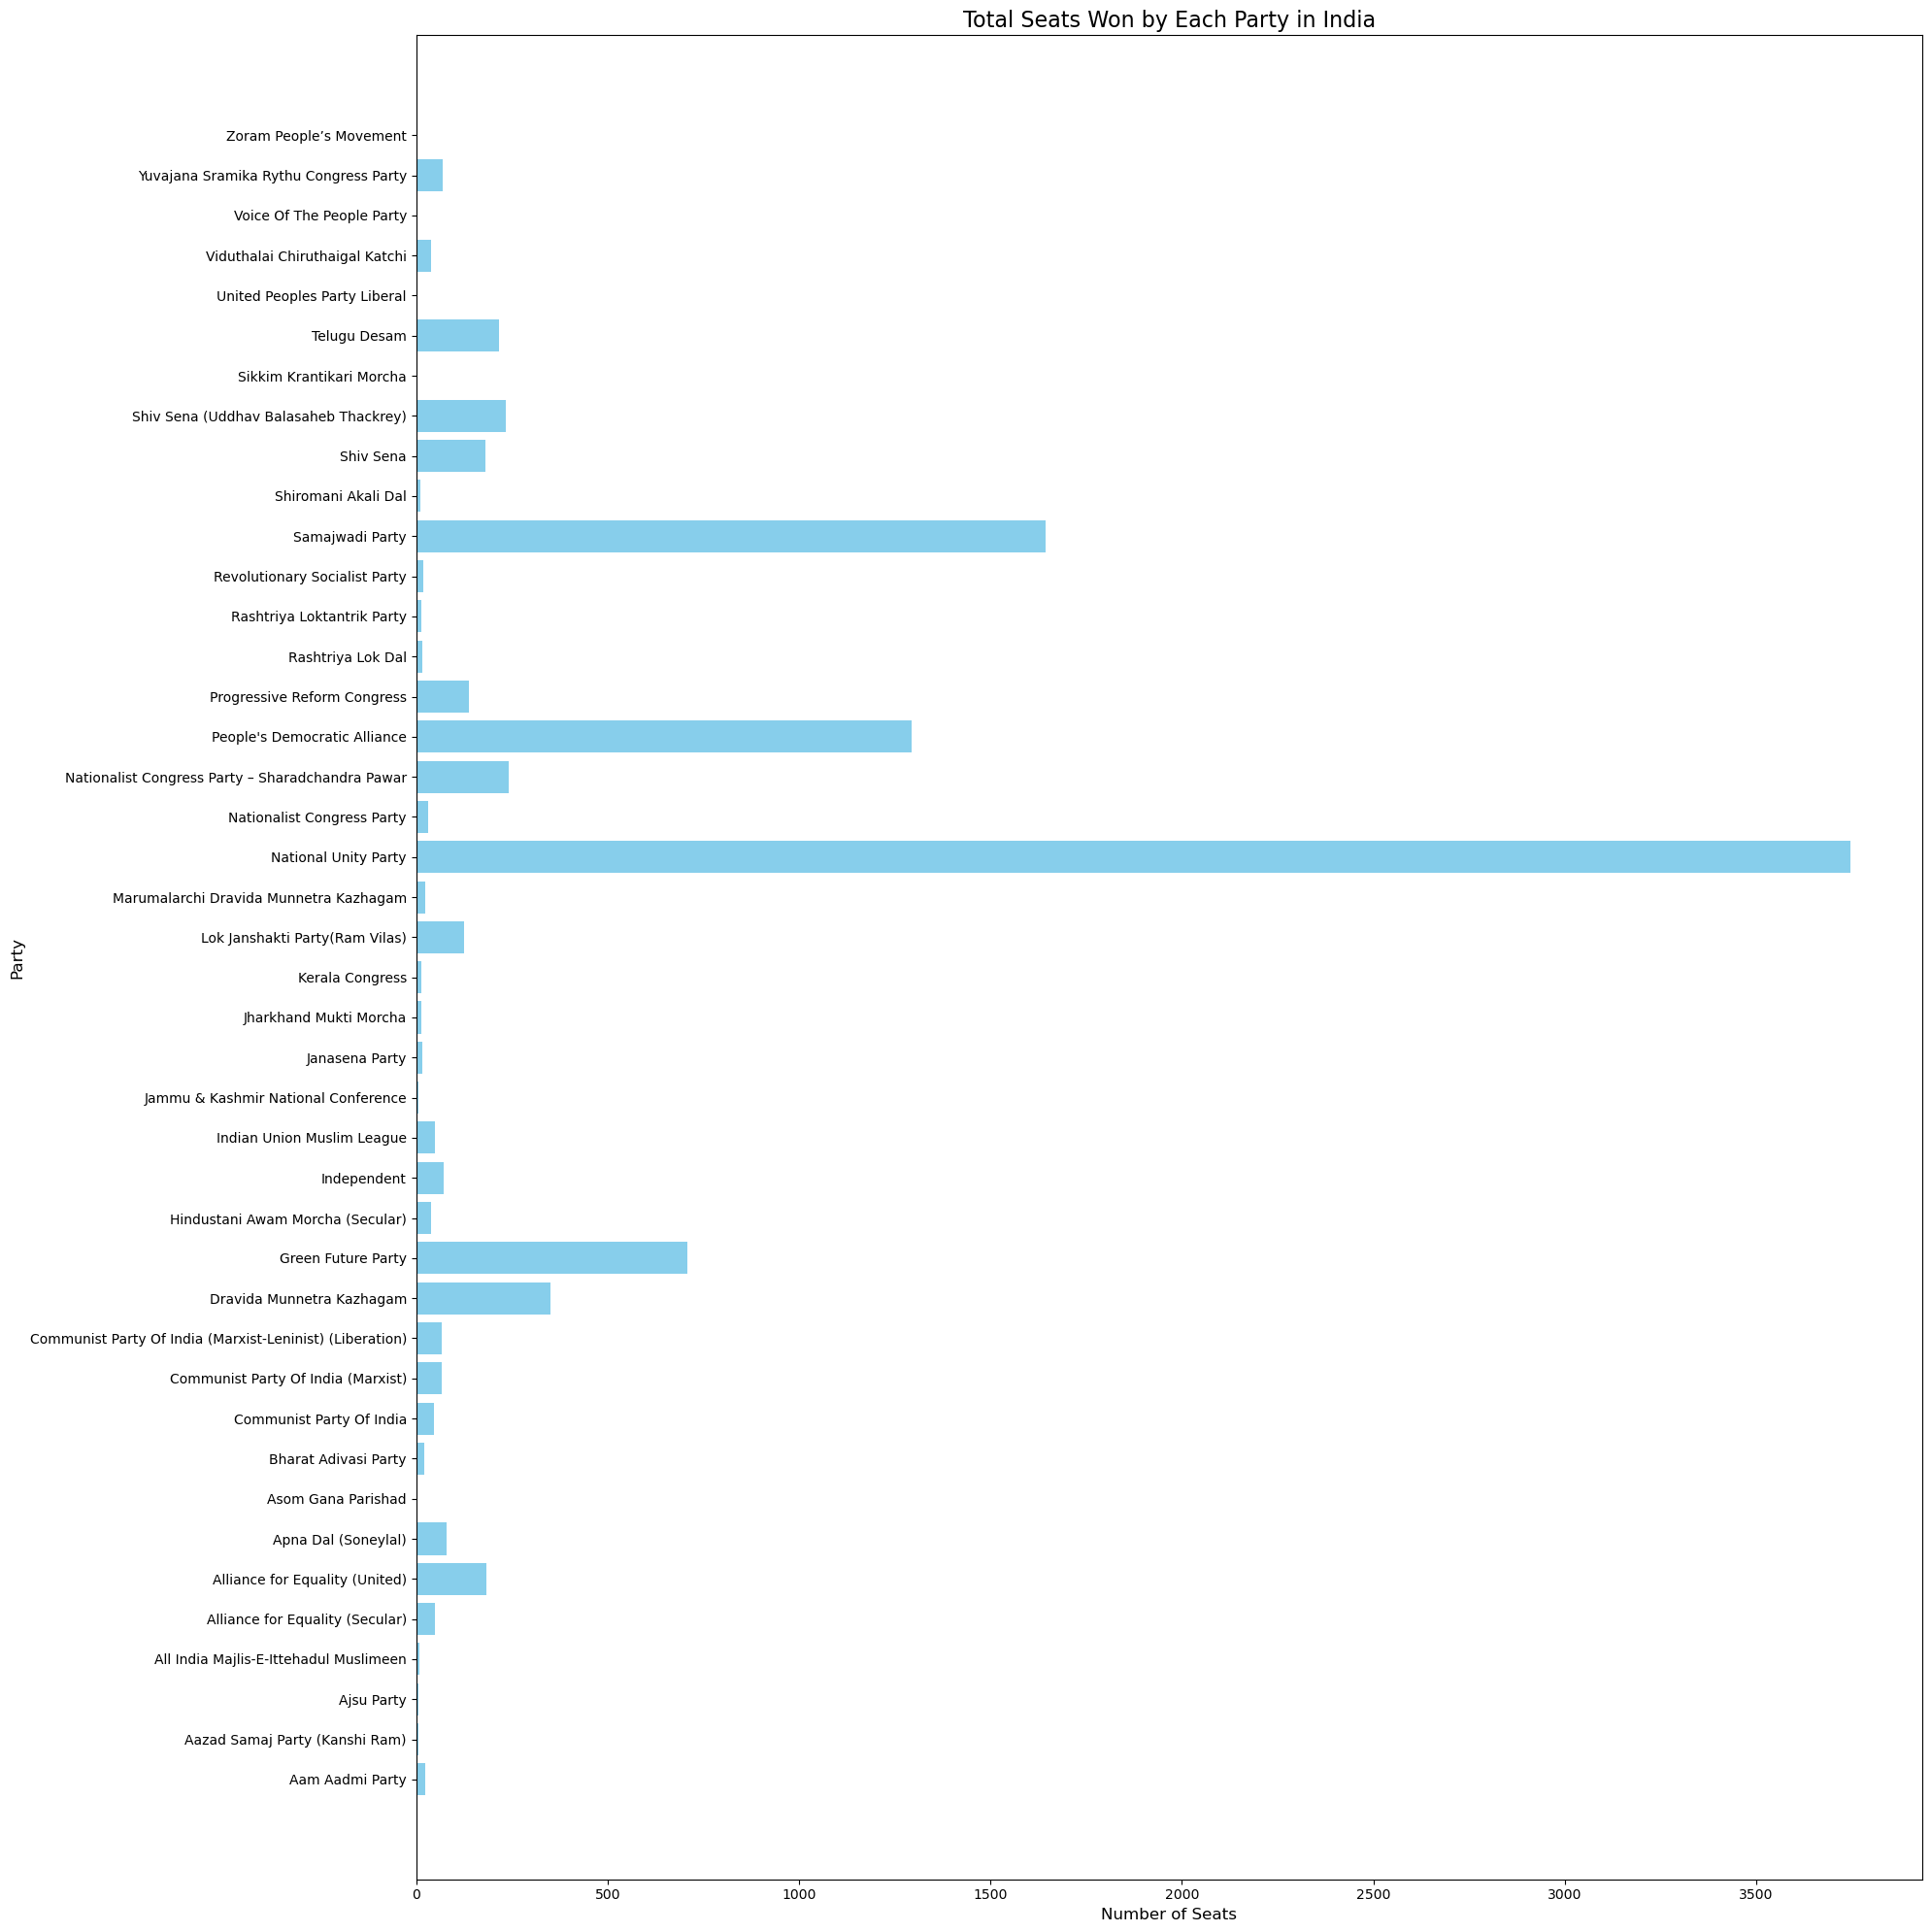

In [27]:
# Bar chart for total seats won by each party
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.barh(party_analysis['party'], party_analysis['no._of_seats'], color='skyblue')
plt.title('Total Seats Won by Each Party in India', fontsize=16)
plt.xlabel('Number of Seats', fontsize=12)
plt.ylabel('Party', fontsize=12)
plt.tight_layout()
plt.show()

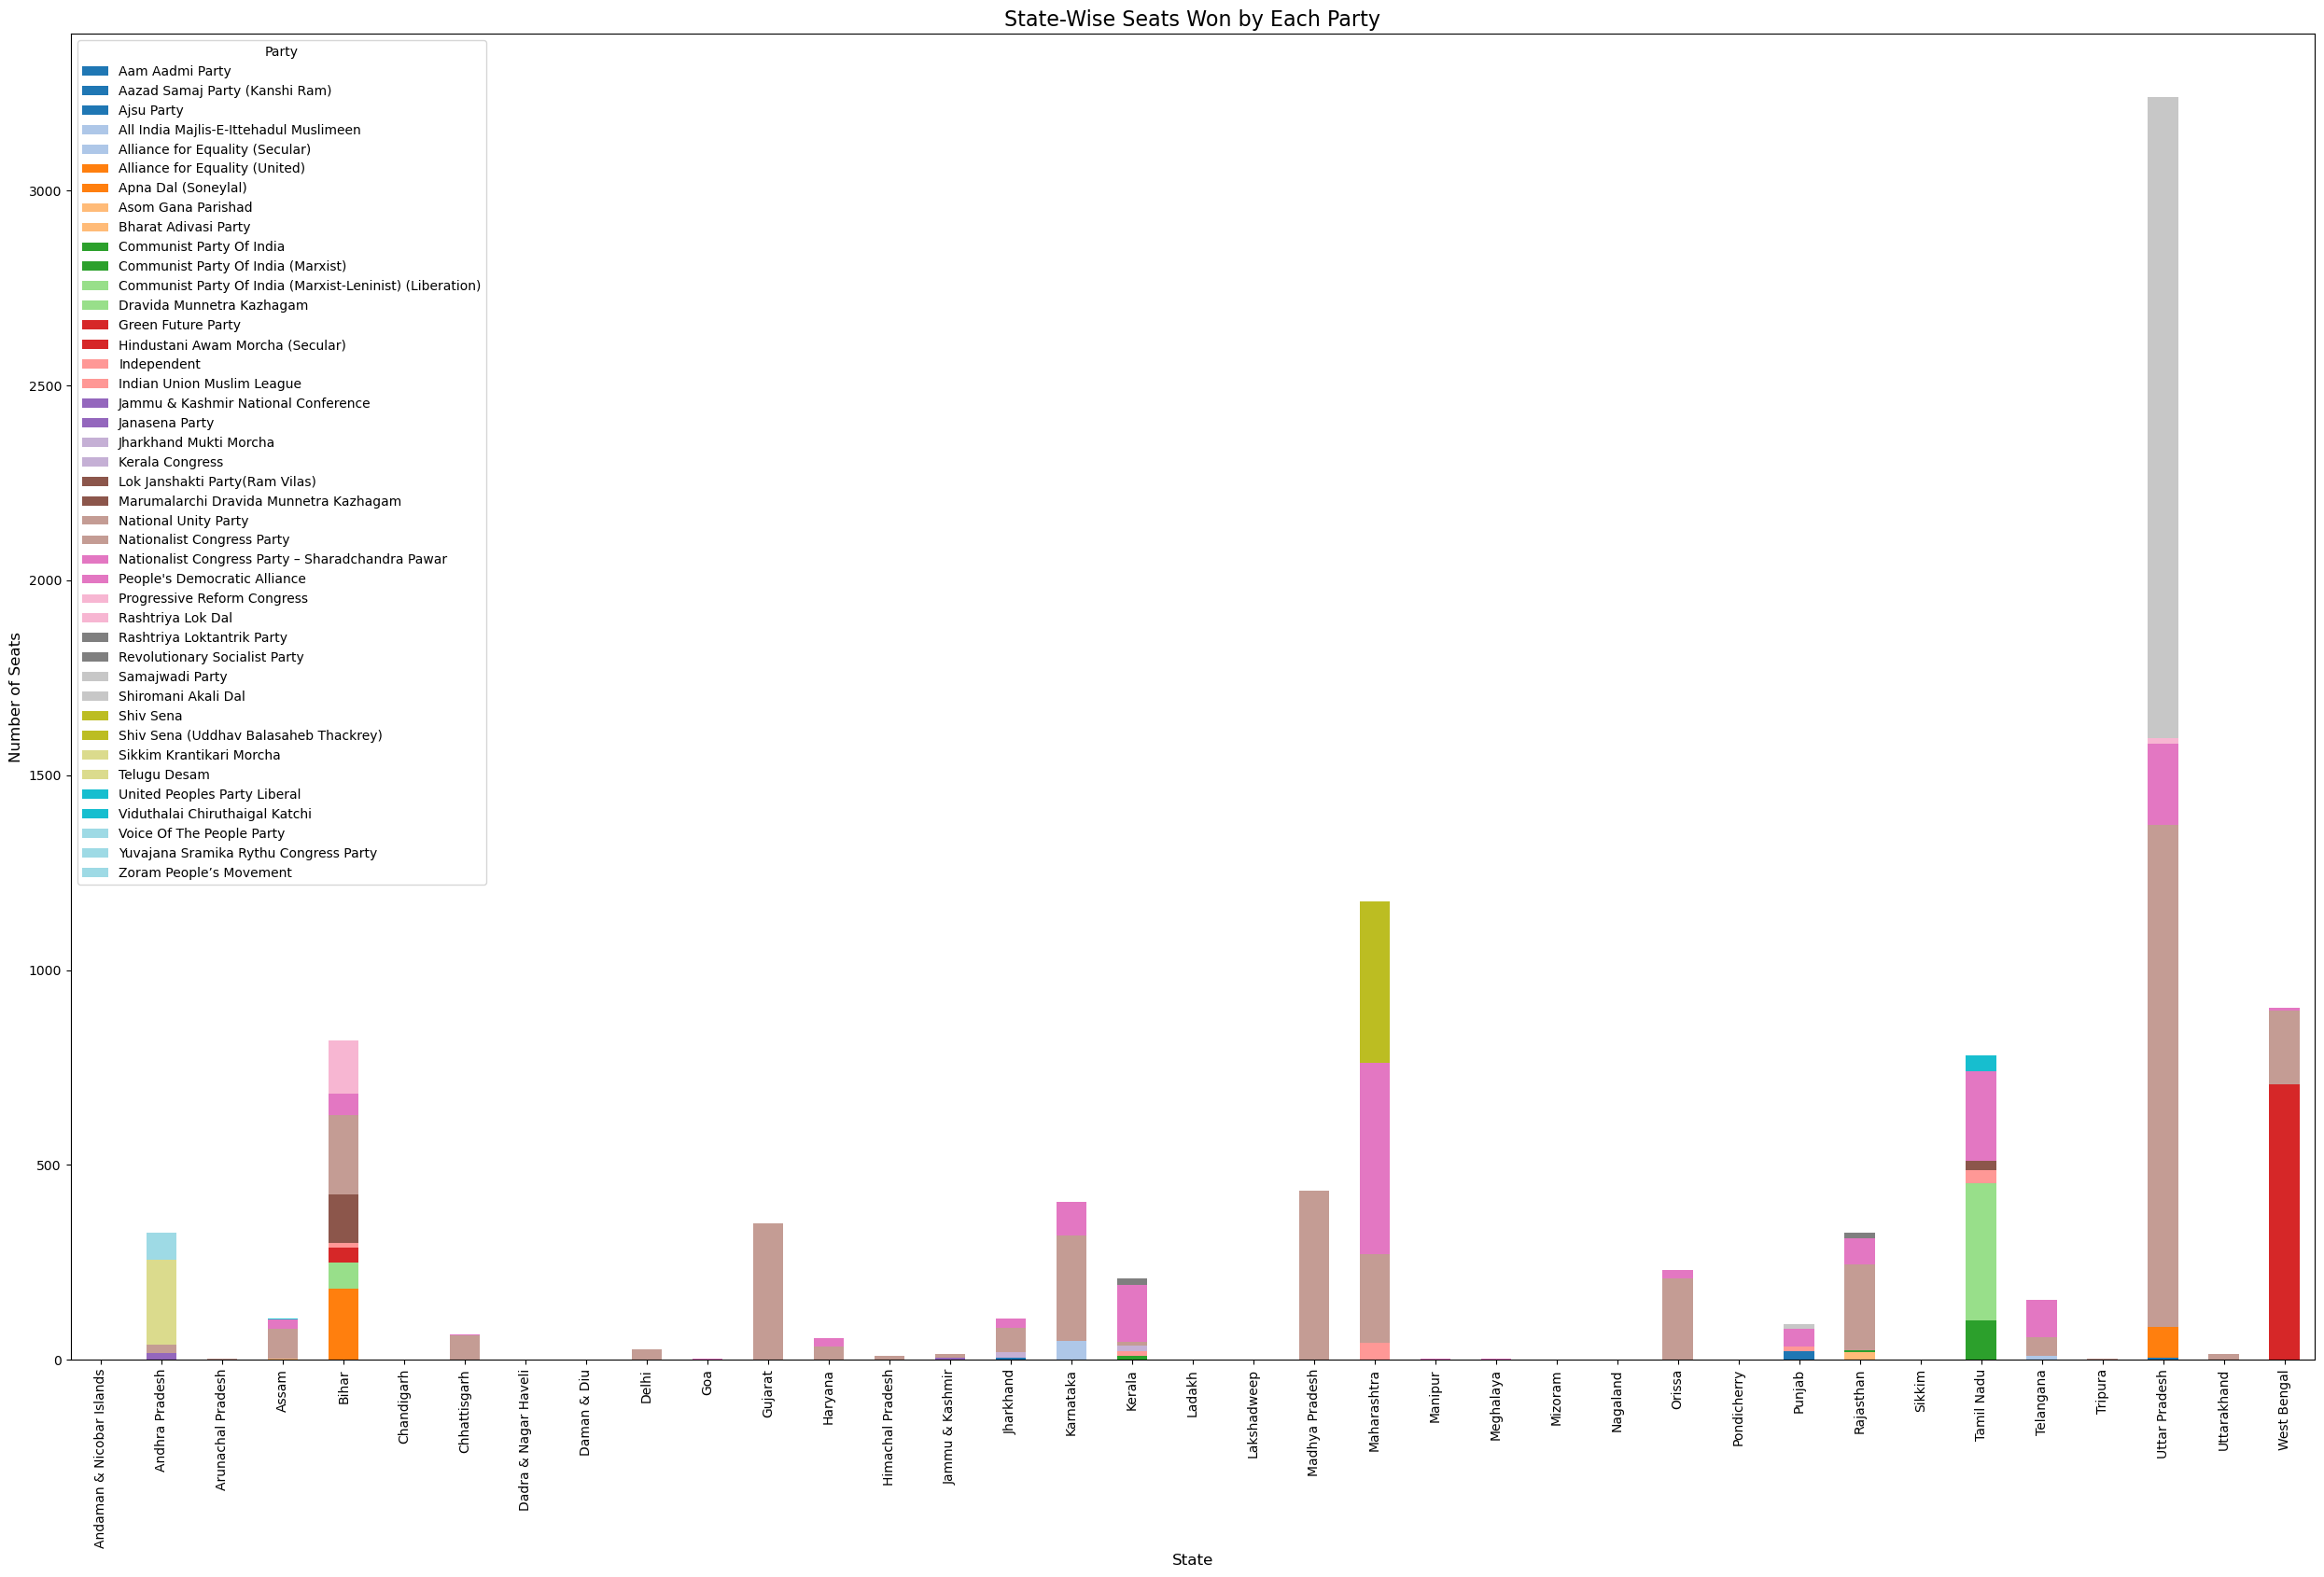

In [53]:
# Pivot data for state-wise analysis
statewise_pivot = statewise_party_seats.pivot(index='state', columns='party', values='no._of_seats').fillna(0)

# Stacked bar chart
statewise_pivot.plot(kind='bar', stacked=True, figsize=(25, 17), colormap='tab20')
plt.title('State-Wise Seats Won by Each Party', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Seats', fontsize=12)
plt.legend(title='Party')
plt.tight_layout()
plt.show()


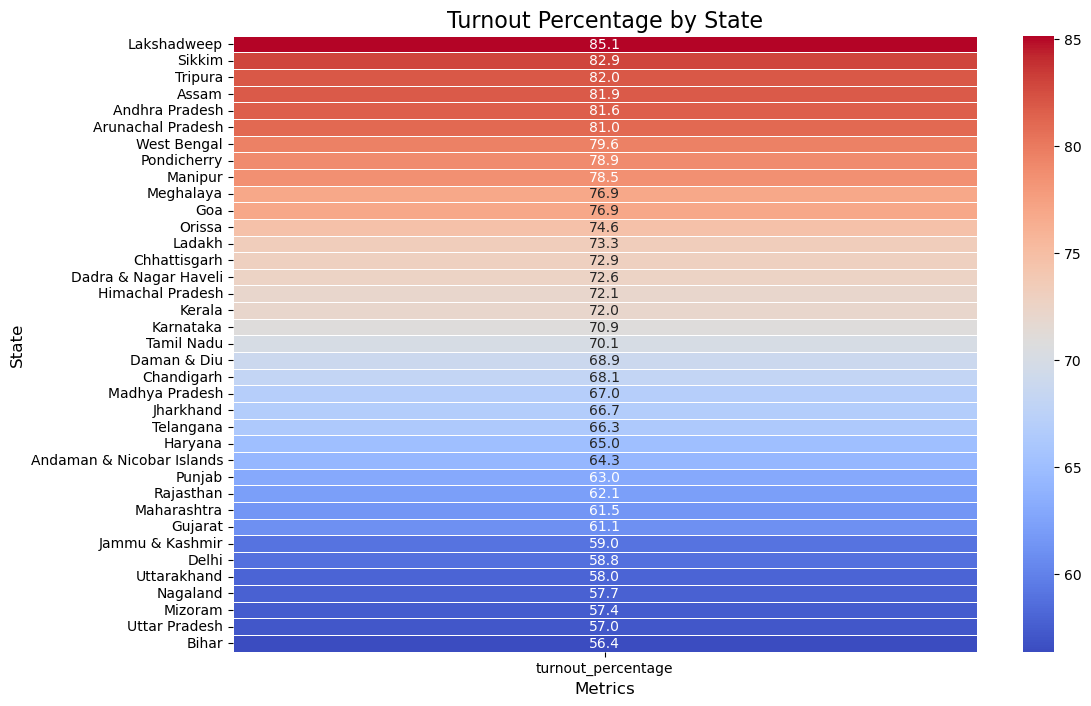

In [57]:
import seaborn as sns

# Heatmap for turnout percentage by state
plt.figure(figsize=(12, 8))
sns.heatmap(statewise_summary[['turnout_percentage']].sort_values('turnout_percentage', ascending=False),
            annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title('Turnout Percentage by State', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()


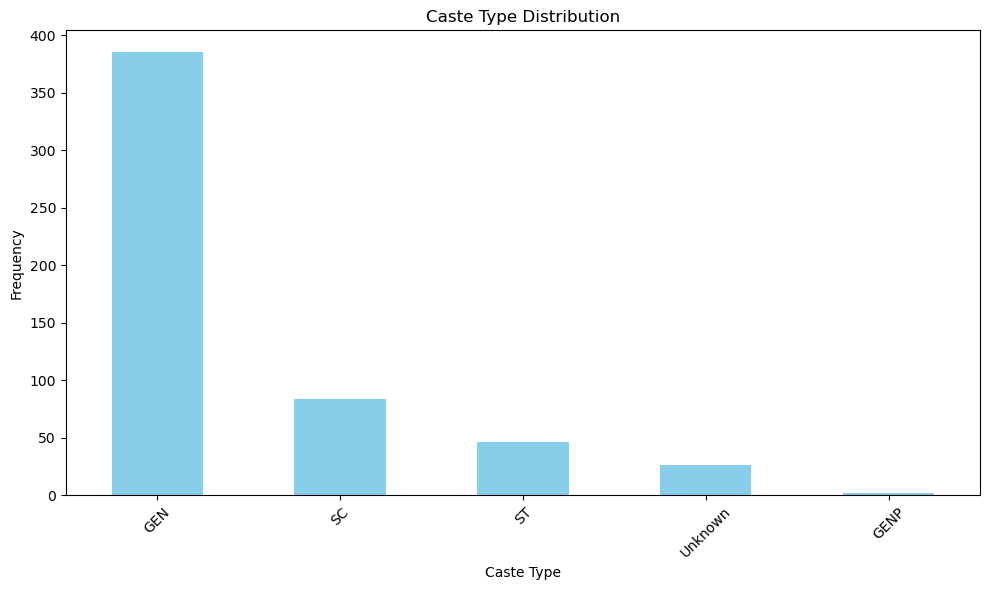

In [49]:
# Bar Chart for Caste Type Distribution
plt.figure(figsize=(10, 6))
caste_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Caste Type')
plt.ylabel('Frequency')
plt.title('Caste Type Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

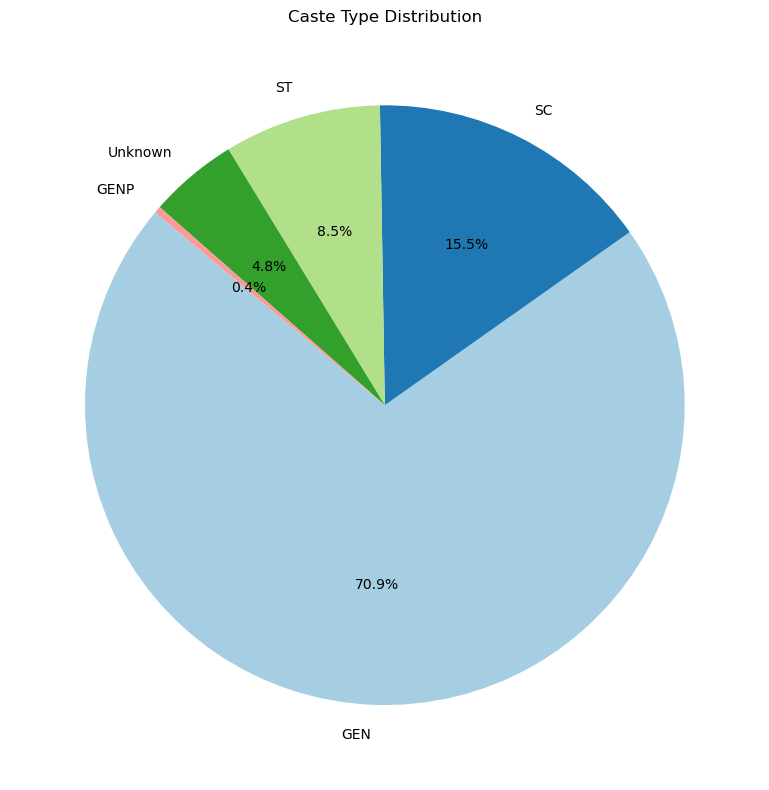

In [51]:
plt.figure(figsize=(8, 8))
caste_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.ylabel('')  # Hide y-label
plt.title('Caste Type Distribution')
plt.tight_layout()
plt.show()

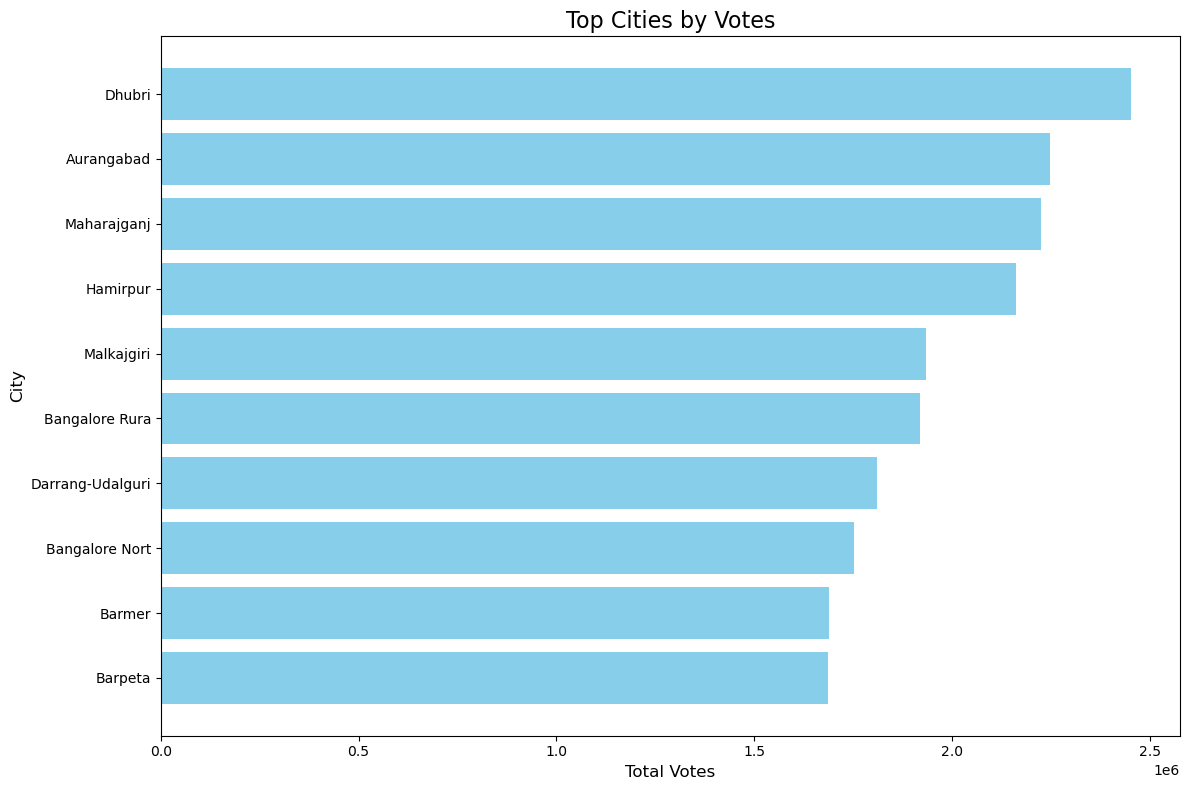

In [77]:
top_cities = data.groupby('city_name')['votes'].sum().reset_index()
top_cities = top_cities.sort_values(by='votes', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_cities['city_name'], top_cities['votes'], color='skyblue')
plt.xlabel('Total Votes', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top Cities by Votes', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
